In [ ]:
import pandas as pd

import numpy as np

pd.set_option('display.max_columns', None)
df= pd.read_csv(r"/content/listings.csv")


df = df.dropna(subset=["price"])

df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)

durchschnitt = df["price"].mean()

print(durchschnitt)

roomtypes = df["room_type"].value_counts()

print(roomtypes)


neighbourhoods = df["neighbourhood_cleansed"].value_counts().head(10)
print(neighbourhoods)

hostname = df["host_name"].value_counts().head(10)
print(hostname)






df


1496.9393210032936
room_type
Entire home/apt    5105
Private room       2717
Hotel room           43
Shared room          29
Name: count, dtype: int64
neighbourhood_cleansed
Cuauhtémoc               3425
Miguel Hidalgo           1325
Benito Juárez            1035
Coyoacán                  600
Álvaro Obregón            369
Tlalpan                   291
Venustiano Carranza       193
Cuajimalpa de Morelos     145
Gustavo A. Madero         129
Iztacalco                  99
Name: count, dtype: int64
host_name
Alejandro    106
HOMi         105
Alejandra    103
Luis          98
Eduardo       92
Carlos        83
Jorge         81
Rodrigo       72
Rafael        66
Ricardo       56
Name: count, dtype: int64


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,2.025032e+13,2025-03-21,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786.0,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,NaN,1.0,1.0,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,NaN,19.382830,-99.271780,Entire villa,Entire home/apt,2.0,1.0,1 bath,1.0,1.0,"[""Wifi"", ""Garden view"", ""Pocket wifi"", ""Free p...",3982.0,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,NaN,t,28.0,58.0,88.0,363.0,2025-03-21,0.0,0.0,0.0,284.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,1.0,0.0,0.0,NaN
2,56074,https://www.airbnb.com/rooms/56074,2.025032e+13,2025-03-20,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650.0,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within a day,88%,100%,f,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,San Rafael,1.0,5.0,"['email', 'phone']",t,t,"Mexico City, DF, Mexico",Cuauhtémoc,NaN,19.439770,-99.156050,Entire condo,Entire home/apt,2.0,1.0,1 bath,1.0,1.0,"[""Wine glasses"", ""Hangers"", ""Cooking basics"", ...",585.0,15.0,250.0,15.0,15.0,250.0,250.0,15.0,250.0,NaN,t,26.0,56.0,86.0,361.0,2025-03-20,84.0,1.0,1.0,283.0,0.0,30.0,17550.0,2011-04-02,2025-02-27,4.87,4.95,4.88,4.98,4.94,4.76,4.79,NaN,f,1.0,1.0,0.0,0.0,0.49
4,70644,https://www.airbnb.com/rooms/70644,2.025032e+13,2025-03-22,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109.0,https://www.airbnb.com/users/show/212109,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,100%,93%,t,https://a0.muscache.com/im/users/212109/profil...,https://a0.muscache.com/im/users/212109/profil...,Coyoacán,3.0,4.0,"['email', 'phone', 'work_email']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,NaN,19.354480,-99.162170,Entire rental unit,Entire home/apt,2.0,1.0,1 bath

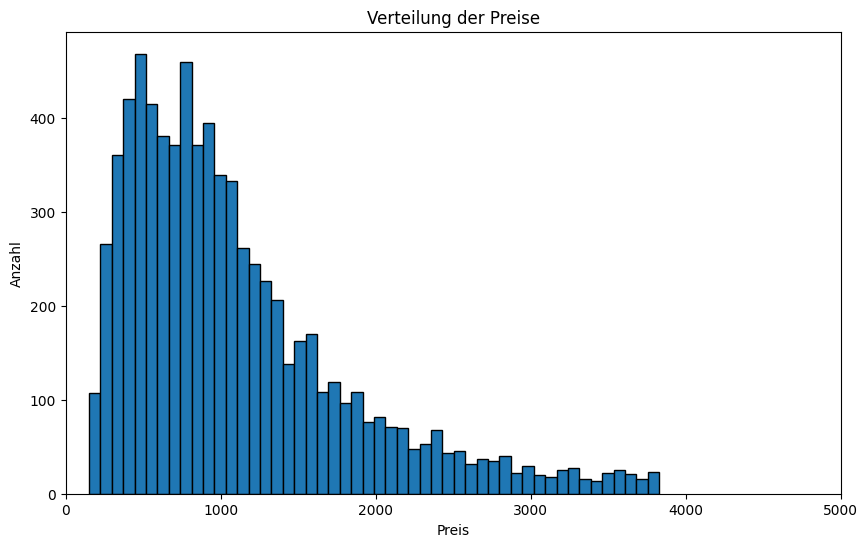

In [ ]:
import matplotlib.pyplot as plt



upper = df["price"].quantile(0.95)


df_filtered = df[(df["price"] <= upper)]


plt.figure(figsize=(10,6))
plt.hist(df_filtered["price"], bins=50, edgecolor="black")
plt.title("Verteilung der Preise")
plt.xlabel("Preis")
plt.ylabel("Anzahl")
plt.xlim(0, 100)
plt.xticks(np.arange(0, 6000, 1000))

plt.show()






In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np



pd.set_option('display.max_columns', None)
df= pd.read_csv(r"/content/listings.csv")


df = df.dropna(subset=["price"])

df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)



lower = df["price"].quantile(0.05)
upper = df["price"].quantile(0.95)
df = df[(df["price"] >= lower) & (df["price"] <= upper)]


X = df[["longitude","latitude"]].values
y = df["price"].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

reg.score(X, y)

0.05042488707754711